# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [19]:
import pandas as pd
df = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
#sales
#vendite maggiori di 10 
print (f'vendite maggiori di 10 = {df[df['sales'] > 10]}')
#dati 2018
print(f'\n dati del 2018 \n {df[df['year'] ==2018]}')

#dati > 13 e = 2018
print(f'\n dati > 13 e = 2018 \n {df[(df['year'] ==2018) & (df["sales"]>13)]}') #NB bisogna usare & per avere multipli filtri 
#dati < 13 e !2018
print(f'\n dati < 13 e != 2018 \n {df[(df['year'] !=2018) & (df["sales"]<13)]}') #NB bisogna usare & per avere multipli filtri 

# dati dove le vendite/3 >3 
print(f'dati dove le vendite/3 >3 \n{df[df['sales']/3 >=3]}')
#dipendenti con nome alfabetico > J
print ("dipendenti con nome alfabeticamente dopo la \"J\"\n")
for dipendente in df['employee'].unique(): 
    if dipendente > "J": print(dipendente)

#modo 2 
print ("dipendenti con nome alfabeticamente dopo la \"J\"\n")
print (df[df['employee']>"J"]['employee'])


vendite maggiori di 10 =   employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020

 dati del 2018 
   employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018

 dati > 13 e = 2018 
   employee  sales  year
0  Katrina     14  2018

 dati < 13 e != 2018 
      employee  sales  year
2         Jan      6  2020
4  Jacqueline      8  2020
5       Paola      3  2019
6   Esperanza      7  2019
8      Egweyn      5  2020
dati dove le vendite/3 >3 
  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020
dipendenti con nome alfabeticamente dopo la "J"

Katrina
Jan
Roman
Jacqueline
Paola
dipendenti con nome alfabeticamente dopo la "J"

0       Katrina
2           Jan
3         Roman
4    Jacqueline
5         Paola
Name: employee, dtype: object


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
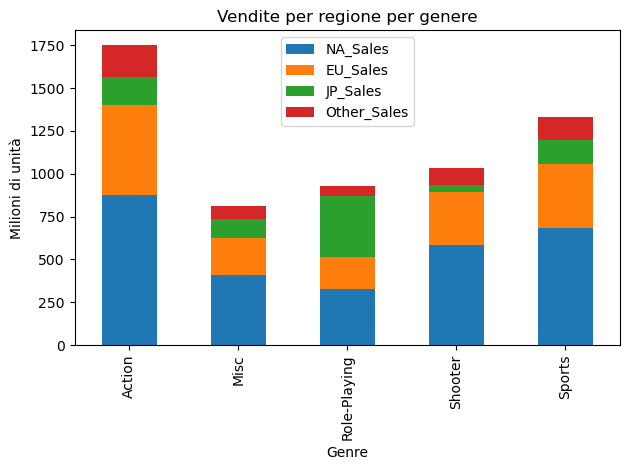


In [20]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


numero di videogiochi pubblicati = 16598


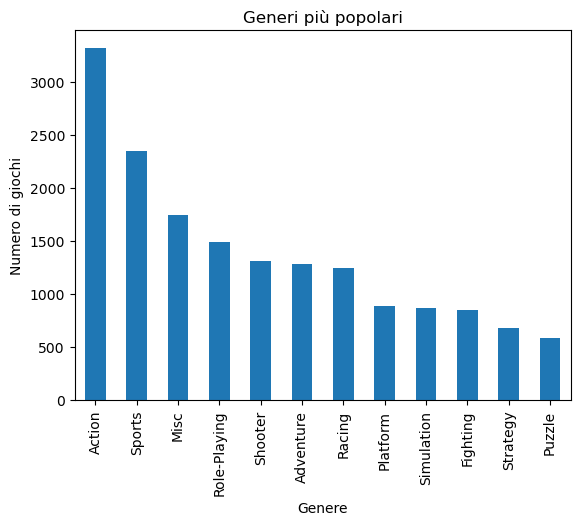

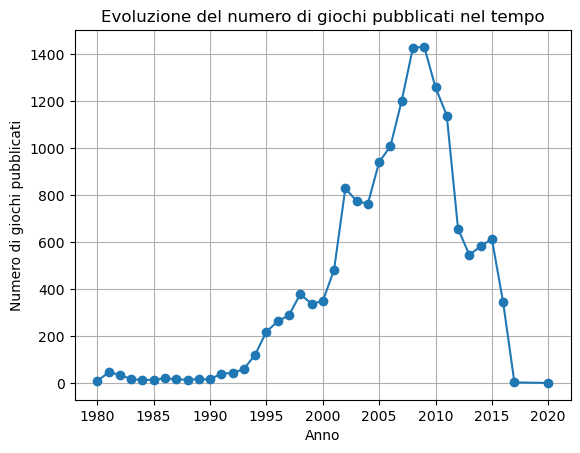

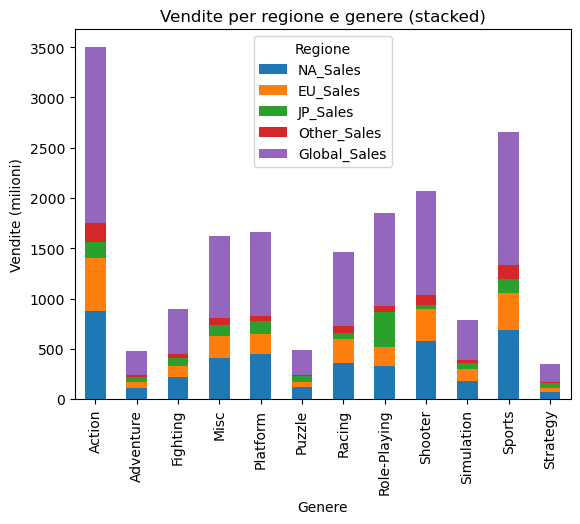

In [33]:
#parte di domande 
# Quanti videogiochi sono stati pubblicati
print(f'numero di videogiochi pubblicati = {df.shape[0]}')
# 2. Quali sono i generi più popolari? Mostralo con un bar plot
group = df['Genre'].value_counts()
group.plot(kind="bar")
plt.xlabel('Genere')
plt.ylabel('Numero di giochi')
plt.title('Generi più popolari')
plt.show()
# 3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
giochi_per_anno = df['Year'].value_counts().sort_index()

plt.plot(giochi_per_anno.index, giochi_per_anno.values, marker='o')
plt.xlabel('Anno')
plt.ylabel('Numero di giochi pubblicati')
plt.title('Evoluzione del numero di giochi pubblicati nel tempo')
plt.grid(True)
plt.show()

#Ricreo il plot 
regioni = [col for col in df.columns if col.endswith('_Sales')] #array con le colonne che hanno "_Sales" alla fine 
vendite_per_genere= df.groupby('Genre')[regioni].sum()
vendite_per_genere.plot(kind='bar', stacked=True)
plt.xlabel('Genere')
plt.ylabel('Vendite (milioni)')
plt.title('Vendite per regione e genere (stacked)')
plt.legend(title='Regione')
plt.show()
